# In this notebook I will go through the weather data taken from https://www.kaggle.com/datasets/budincsevity/szeged-weather

### The analysis will be a starting point how to clean data, create new helpful variables and what to consider before creating a predictive m

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
data = pd.read_csv("weatherHistory.csv", delimiter=",")
plt.style.use("dark_background")

In [2]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# Explanation of non obvious columns
wind Bearing - the direction from wind winds, where 0 or 360 is from north, 90 - from east etc.    
Loud Cover - shouldn't it be Cloud Cover?  
Precip Type - for example rain or snow  


In [4]:
num_col_names = list(data.select_dtypes(include=[np.number]).columns.values)
char_col_names = [x for x in list(data.columns) if x not in num_col_names]


In [5]:
num_col_names

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [6]:
char_col_names

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


##### As we can see above: only Precip Type has null values

In [8]:
# Look for invalid, negative data
for i in ["Humidity", "Wind Speed (km/h)", "Pressure (millibars)", "Visibility (km)"]:
    column = data[i]
    # Get the count of Zeros in column 
    count = (column < 0).sum()
    print('Number of negative values for  ', i, count)
        


Number of negative values for   Humidity 0
Number of negative values for   Wind Speed (km/h) 0
Number of negative values for   Pressure (millibars) 0
Number of negative values for   Visibility (km) 0


In [9]:
# Look for zeros
for i in ["Humidity", "Wind Speed (km/h)", "Pressure (millibars)", "Visibility (km)"]:
    column = data[i]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Number of zeros for  ', i, count)

Number of zeros for   Humidity 22
Number of zeros for   Wind Speed (km/h) 1297
Number of zeros for   Pressure (millibars) 1288
Number of zeros for   Visibility (km) 450


-pressure cannot be 0, maybe these are missing measurements  
-humidity equals 0 is possible but it should be very rare, so 22 obs. are fine  
-wind speed can be 0 theoretically  
-visibility 0 (km) is possible (visibility between 0 and 1000 meters)  

# histograms of numeric columns

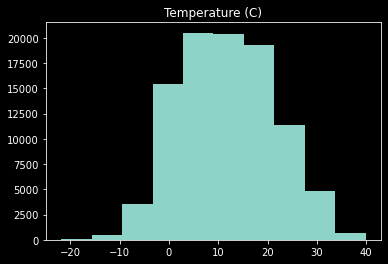

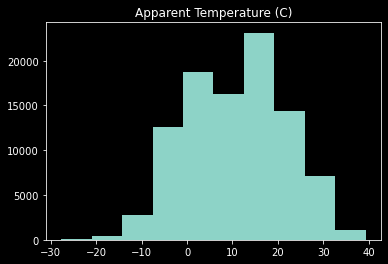

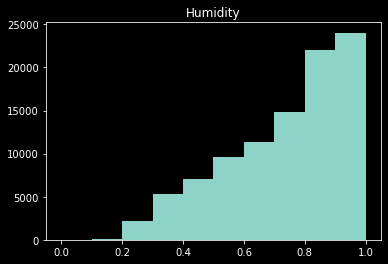

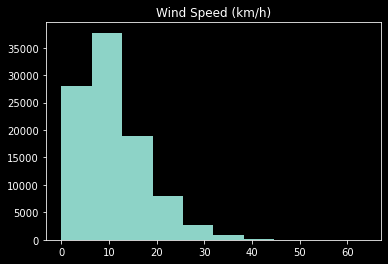

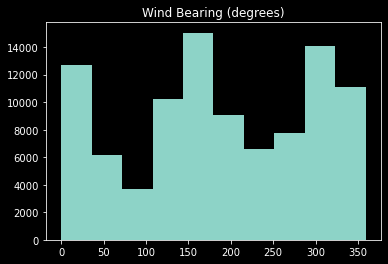

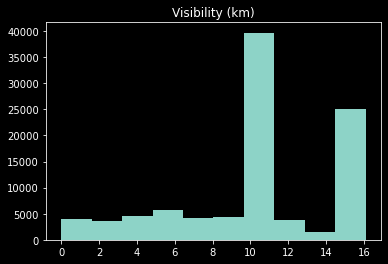

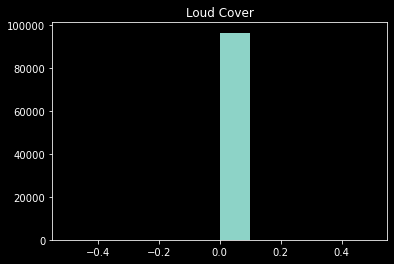

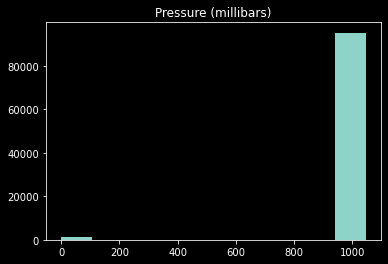

In [10]:

for i in data[num_col_names].columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

##### Temperature histogram looks like normal distribution, lets verify this 

In [11]:
stats.shapiro(data['Temperature (C)'])

C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9928411841392517, pvalue=0.0)

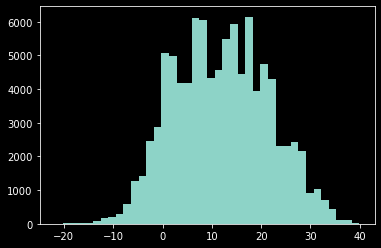

In [12]:
plt.hist(data['Temperature (C)'], bins=40);

#### Conclusion from the test and more accurate histogram:
##### the p-value tells us that the hypothesis that the data is taken from normal distribution should be rejected


# Correlations between numeric columns

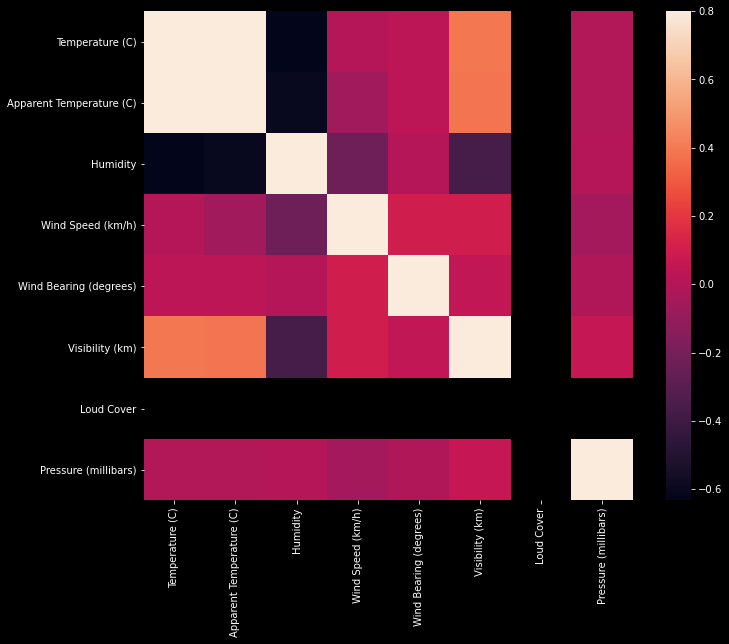

In [13]:
#correlation matrix
corr_mat = data[num_col_names].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);

In [14]:
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

Humidity                  Temperature (C)            -0.632255
                          Apparent Temperature (C)   -0.602571
Visibility (km)           Humidity                   -0.369173
Wind Speed (km/h)         Humidity                   -0.224951
                          Apparent Temperature (C)   -0.056650
Pressure (millibars)      Wind Speed (km/h)          -0.049263
                          Wind Bearing (degrees)     -0.011651
                          Temperature (C)            -0.005447
                          Apparent Temperature (C)   -0.000219
Wind Bearing (degrees)    Humidity                    0.000735
Pressure (millibars)      Humidity                    0.005454
Wind Speed (km/h)         Temperature (C)             0.008957
Wind Bearing (degrees)    Apparent Temperature (C)    0.029031
                          Temperature (C)             0.029988
Visibility (km)           Wind Bearing (degrees)      0.047594
Pressure (millibars)      Visibility (km)             0

### Conclusions 
- temp and apparent temp are linearly correlated which is logical
- humidity is the only variable not too bad correlated with temperatures
- it is reasonable that the direction of wind (wind bearing) is not correlated with temp

### Plots: The dependence of temperature on other numeric variables

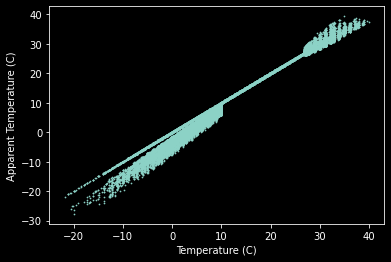

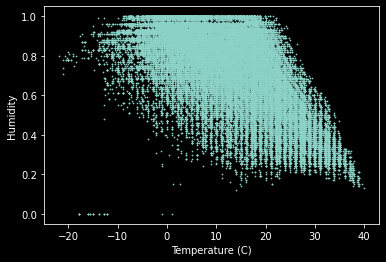

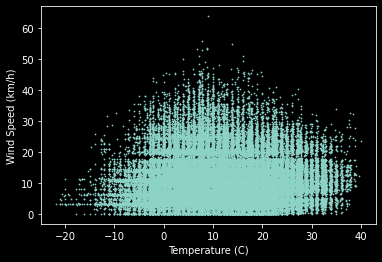

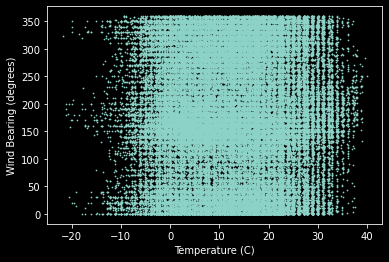

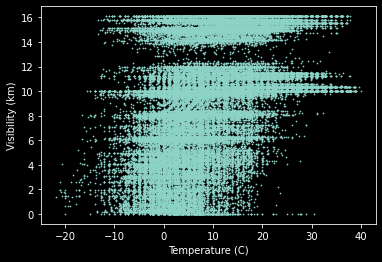

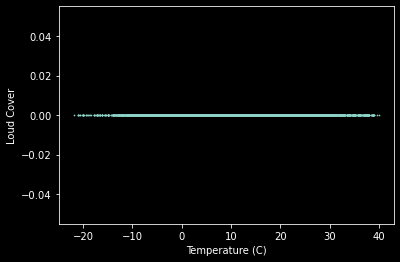

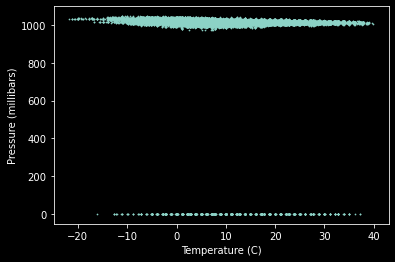

In [15]:
for colName in [x for x in num_col_names if x != 'Temperature (C)']:
    plt.scatter(data['Temperature (C)'], data[colName], s=0.5)
    plt.xlabel('Temperature (C)')
    plt.ylabel(colName)
    plt.show()

# Now lets look at char variables

In [16]:
char_col_names

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [17]:
data['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [18]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [21]:
pd.pivot_table(data, values='Temperature (C)', index='Summary', aggfunc=['mean', np.std, 'min', 'max', 'count'])

,mean,std,min,max,count
,Temperature (C),Temperature (C),Temperature (C),Temperature (C),Temperature (C)
Breezy,7.922016,10.706180,-2.777778,37.588889,54
Breezy and Dry,21.111111,NaN,21.111111,21.111111,1
Breezy and Foggy,-0.510317,5.081695,-3.827778,17.616667,35
Breezy and Mostly Cloudy,11.093411,6.683639,-6.966667,27.522222,516
Breezy and Overcast,7.241614,5.592556,-11.533333,22.433333,528
Breezy and Partly Cloudy,12.492761,8.140788,-5.050000,38.438889,386
Clear,11.925109,10.018959,-20.000000,39.905556,10890
Dangerously Windy and Partly Cloudy,8.944444,NaN,8.944444,8.944444,1
Drizzle,10.847578,2.485500,7.805556,17.844444,39


-NaN stds come from the fact that some values appears only once and there is dividing by 0  
-one could split above values into single states like 'wind', 'dry', 'mostly Cloudy', 'Foggy' etc., i will do it to generalise data and reduce the number of rare cases, in other words, i'll do one hot encoding manually
 

In [25]:
data['is_partly_cloudy'] = data['Summary'].apply(lambda x: 1 if 'Partly Cloudy' in x else 0)
data['is_mostly_cloudy'] = data['Summary'].apply(lambda x: 1 if 'Mostly Cloudy' in x else 0)
data['is_overcast'] = data['Summary'].apply(lambda x: 1 if 'Overcast' in x else 0)
data['is_humid'] = data['Summary'].apply(lambda x: 1 if 'Humid' in x else 0)
data['is_windy'] = data['Summary'].apply(lambda x: 1 if 'Windy' in x else 0)
data['is_foggy'] = data['Summary'].apply(lambda x: 1 if 'Foggy' in x else 0)
data['is_rain'] = data['Summary'].apply(lambda x: 1 if 'Rain' in x else 0)
data['is_breezy'] = data['Summary'].apply(lambda x: 1 if 'Breezy' in x else 0)
data['is_dry'] = data['Summary'].apply(lambda x: 1 if 'Dry' in x else 0)
data['is_clear'] = data['Summary'].apply(lambda x: 1 if 'Clear' in x else 0)
data['is_drizzle'] = data['Summary'].apply(lambda x: 1 if 'Drizzle' in x else 0)

Maybe i didnt do any typo...

## Lets examine temperature in particular months

In [29]:
data['Formatted Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [26]:
data['month'] = data['Formatted Date'].str.slice(5, 7)

In [27]:
pd.pivot_table(data, values='Temperature (C)', index='month', aggfunc=['mean', 'min', 'max', np.std])

,mean,min,max,std
,Temperature (C),Temperature (C),Temperature (C),Temperature (C)
month,,,,
01,0.813890,-15.000000,15.738889,4.882420
02,2.159699,-21.822222,19.950000,5.619192
03,6.906599,-10.100000,22.822222,5.465917
04,12.756417,-3.888889,31.061111,5.512071
05,16.873692,1.361111,33.816667,5.338531
06,20.715617,5.577778,36.133333,5.613027
07,22.963943,7.950000,39.905556,5.739162
08,22.345031,7.711111,38.861111,5.899980


In [32]:
data['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

#### The values above are a little complicated and i dont think it would tell us more than 'Summary'

# Up to this point:  
- the linearity bethween the variables is really poor and linear regression doesnt seem to be a good idea, however, later on, i will try and see what will happen  
- one could think about this data and temperature as time series but i dont want to touch this field in this analysis

# What about the difference between Apparent temp. and temp? 

In [33]:
num_col_names

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [34]:
data['temp_diff'] = data['Apparent Temperature (C)'] - data['Temperature (C)']

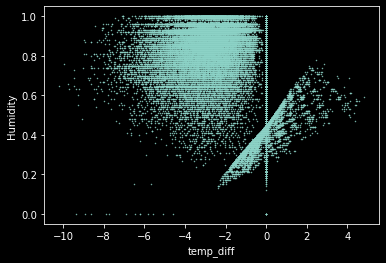

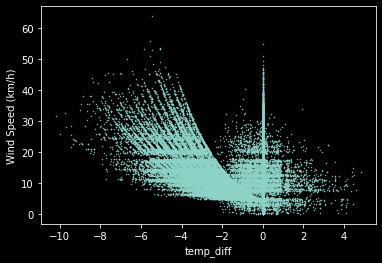

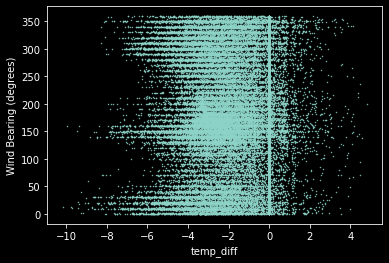

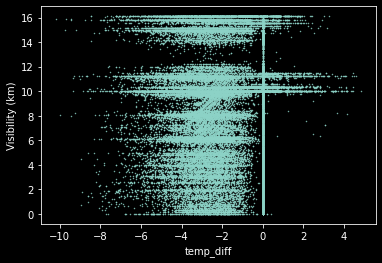

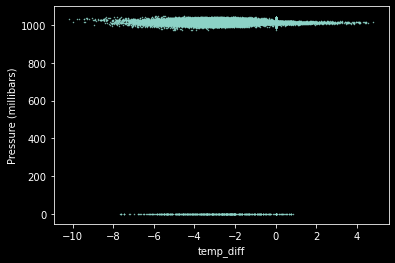

In [36]:
for colName in [x for x in num_col_names if x != 'Temperature (C)' and x != 'Apparent Temperature (C)' and x!= 'Loud Cover']:
    plt.scatter(data['temp_diff'], data[colName], s=0.2)
    plt.xlabel('temp_diff')
    plt.ylabel(colName)
    plt.show()

#### These plots dont show any sensible patterns, maybe wind speed looks interesting in the sense that the stronger wind the the bigger temp. difference (but there also many cases which do not follow this trend) 